# HANC 2 types of labour

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
  - 3.1. [Direct approach](#toc3_1_)    
  - 3.2. [Looking at the stationary equilibrium](#toc3_2_)    
    - 3.2.1. [Policy functions](#toc3_2_1_)    
    - 3.2.2. [Distributions](#toc3_2_2_)    
  - 3.3. [Indirect approach](#toc3_3_)    
- 4. [Idiosyncratic risk and the steady state interest rate](#toc4_)    
- 5. [Calibration](#toc5_)    
- 6. [Extra: Demand vs. supply of capital](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Import stuff**

In [10]:
%load_ext autoreload
%autoreload 2
from copy import deepcopy
import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [11]:
model = HANCModelClass(name='baseline') # create an instance of the model
par = model.par
ss = model.ss

production_firm: [K,phi_0,phi_1] -> [rK,w0,w1,Y,L]
mutual_fund: [K,rK] -> [A,r]
hh: [phi_0,phi_1,r,w0,w1] -> [A_hh,C_hh,L_hh]
market_clearing: [A,A_hh,L,L_hh,Y,C_hh,K] -> [I,clearing_A,clearing_L,clearing_Y]


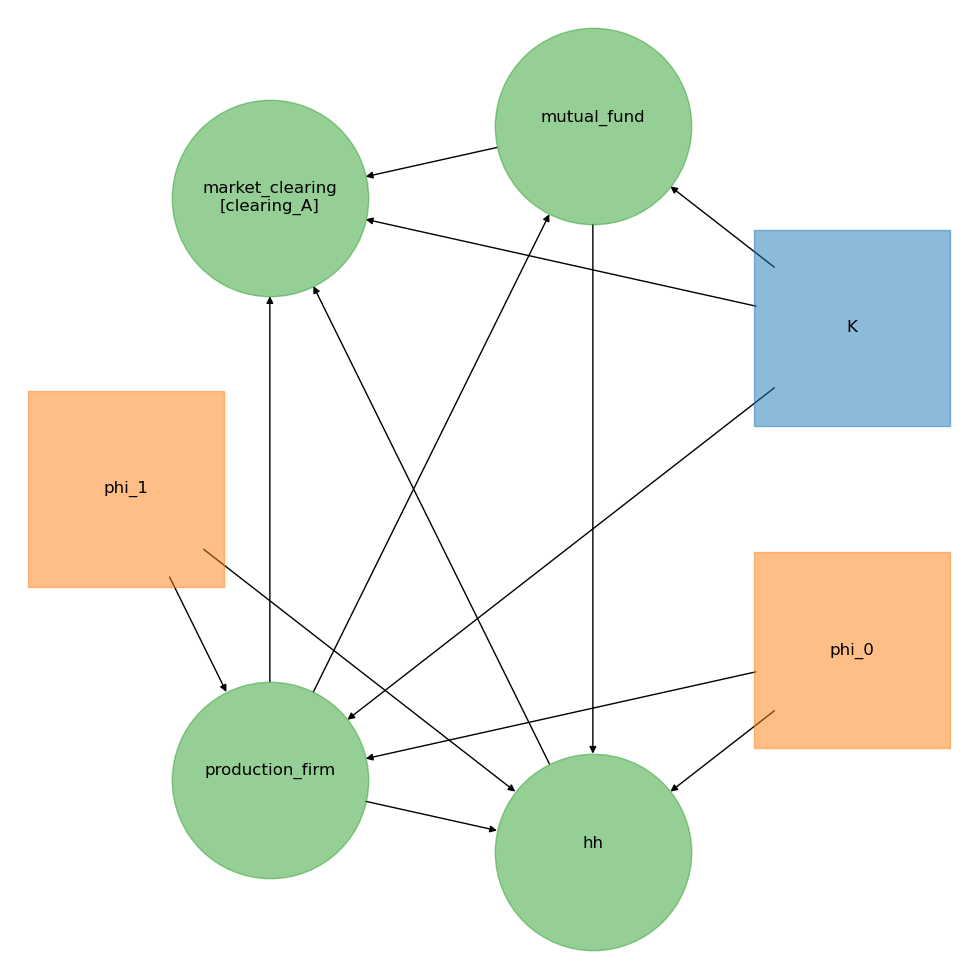

In [12]:
model.info(only_blocks=True)
model.draw_DAG(figsize=(10,10))

## 2. <a id='toc3_'></a>[Find stationary equilibrium](#toc0_)

In [13]:
ss = model.ss
ss.phi_1 = 2.0

In [14]:

model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.1777
implied ss.w1 = 0.3703
implied ss.w0 = 0.3703
household problem in ss solved in 0.2 secs [342 iterations]
household problem in ss simulated in 0.0 secs [113 iterations]
implied ss.A_hh = 535.9821
clearing_A = -534.98213157

guess ss.K = 2.0000
implied ss.r = 0.0782
implied ss.w1 = 0.4752
implied ss.w0 = 0.4752
household problem in ss solved in 0.2 secs [620 iterations]
household problem in ss simulated in 0.0 secs [371 iterations]
implied ss.A_hh = 512.8555
clearing_A = -510.85553541

guess ss.K = 3.0000
implied ss.r = 0.0375
implied ss.w1 = 0.5499
implied ss.w0 = 0.5499
household problem in ss solved in 0.4 secs [1029 iterations]
household problem in ss simulated in 1.6 secs [13625 iterations]
implied ss.A_hh = 502.9870
clearing_A = -499.98702101

guess ss.K = 4.0000
implied ss.r = 0.0144
implied ss.w1 = 0.6099
implied ss.w0 = 0.6099
household problem in ss solved in 0.6 secs [1725 iterations]
household problem in

**Look at the steady state variables:**

In [15]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

K              : 4.1098
phi_0          : 1.0000
phi_1          : 2.0000
rK             : 0.1124
w0             : 0.6159
w1             : 0.6159
Y              : 1.2831
L              : 1.3333
A              : 4.1098
r              : 0.0124
A_hh           : 4.1098
C_hh           : 0.8722
L_hh           : 1.3333
I              : 0.4110
clearing_A     : -0.0000
clearing_L     : 0.0000
clearing_Y     : 0.0000


### 3.2. <a id='toc3_2_'></a>[Looking at the stationary equilibrium](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Policy functions](#toc0_)

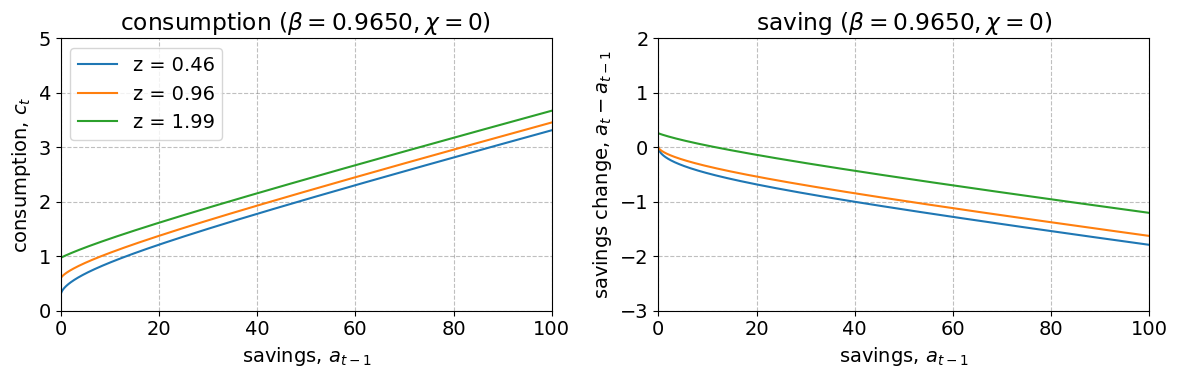

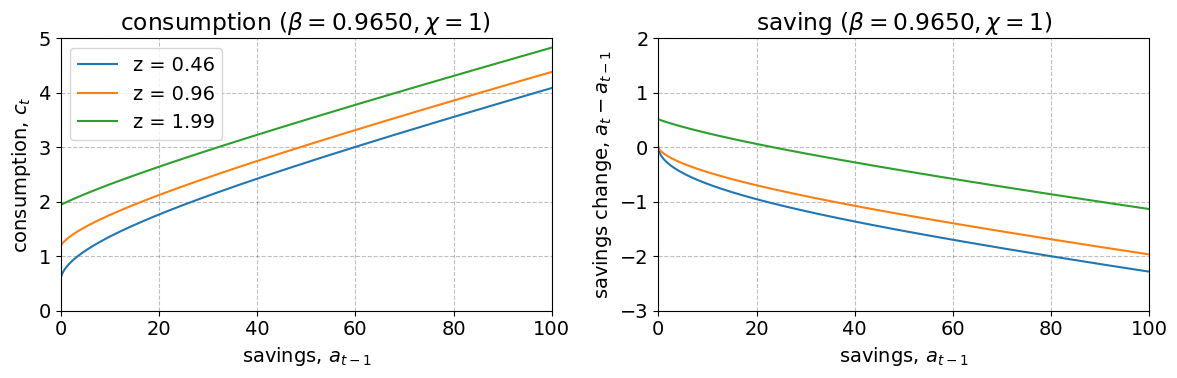

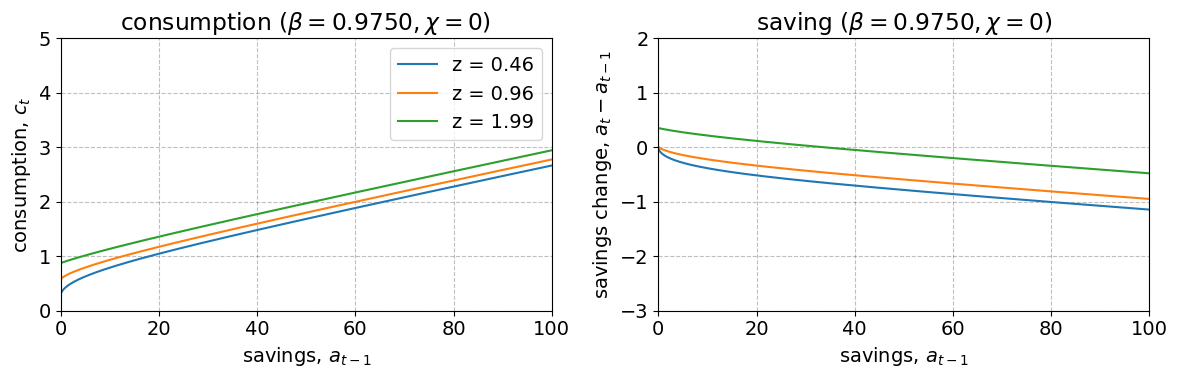

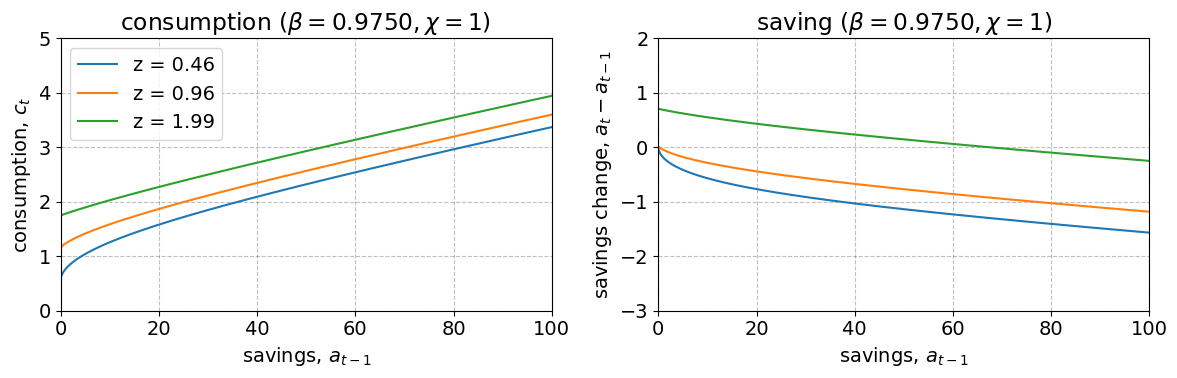

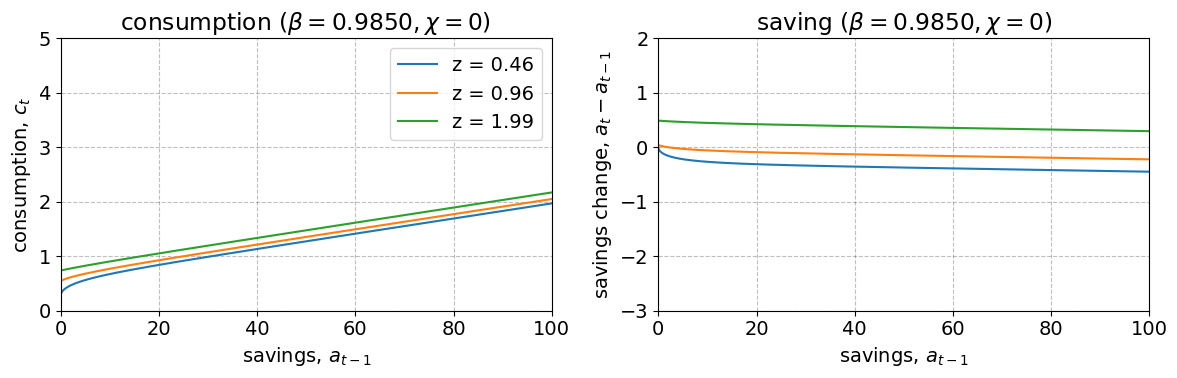

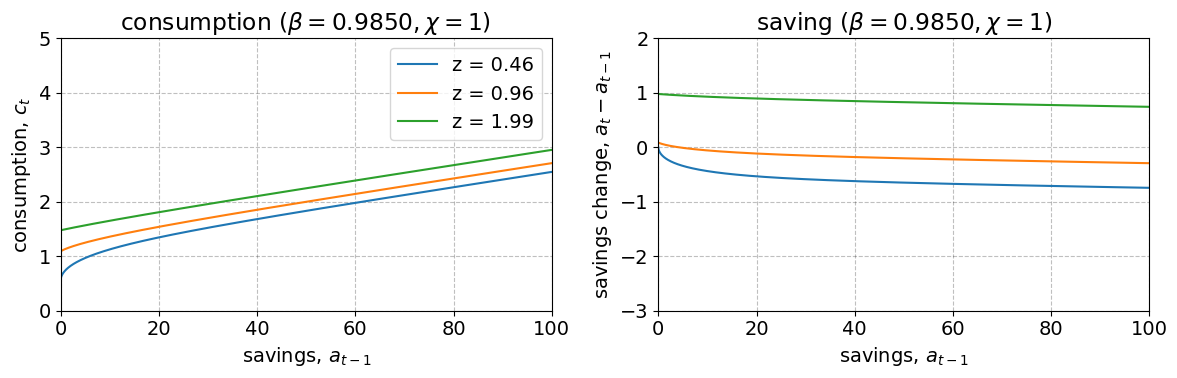

In [16]:

for i_beta, beta in enumerate(par.beta_grid):

    # Skip plotting for the 2nd, 5th, and 7th beta values
    if i_beta in [1, 4, 6]:
        continue
    
    fig = plt.figure(figsize=(12, 4), dpi=100)

    I = par.a_grid < 500

    # a. consumption
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}, \\chi = {par.j_grid[i_beta]}$) ')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz - 1:
            ax.plot(par.a_grid[I], ss.c[i_beta, i_z, I], label=f'z = {z:.2f}')

    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 5)

    # b. saving
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(f'saving ($\\beta = {beta:.4f}, \\chi = {par.j_grid[i_beta]}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz - 1:
            ax.plot(par.a_grid[I], ss.a[i_beta, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0, 100)
    ax.set_ylim(-3, 2)

    fig.tight_layout()
    #fig.savefig(f'figs/c_func_{i_beta}.pdf')


#### 3.2.2. <a id='toc3_2_2_'></a>[Distributions](#toc0_)

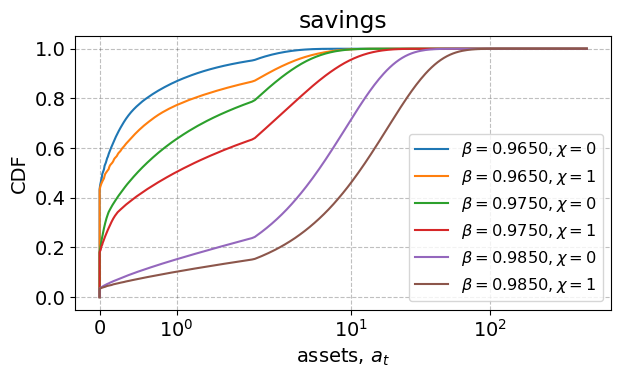

In [17]:
fig = plt.figure(figsize=(12,4),dpi=100)

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
for i_beta,beta in enumerate(par.beta_grid):
    if i_beta in [1, 4, 6]:
        continue
    ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D[i_beta],axis=0)),0,0.0)*par.Nfix, label = f'$\\beta = {beta:.4f}, \\chi = {par.j_grid[i_beta]}$')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')
ax.legend(loc = 'lower right', fontsize = 'small')

fig.tight_layout()





### 3.3. <a id='toc3_2_'></a>[Tests](#toc0_)

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.5 secs



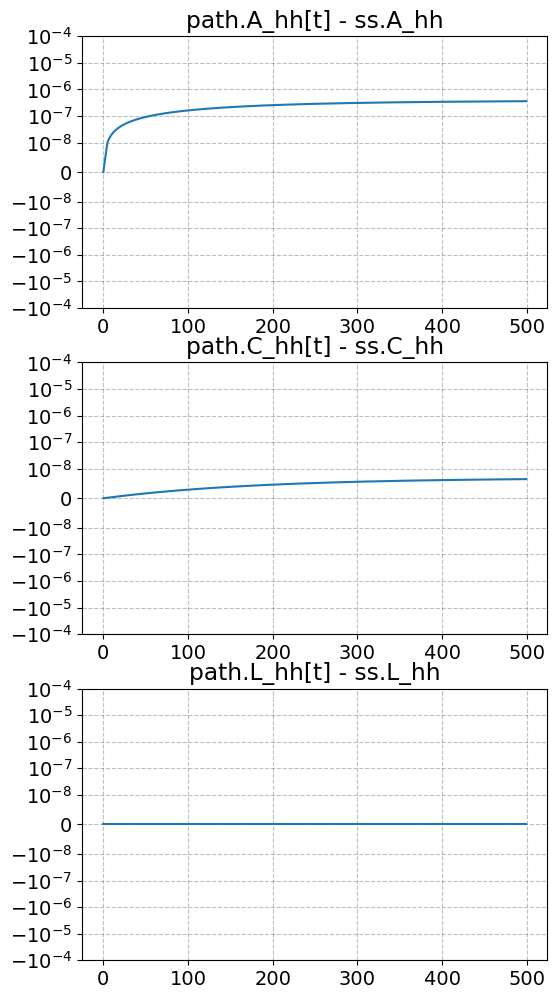

In [18]:
model.test_hh_path()

In [19]:
model.test_path()

shocks: phi_1 phi_0 
unknowns: K 

blocks.production_firm
 rK               0.0e+00
 w0               0.0e+00
 w1               1.1e-16
 Y                0.0e+00
 L                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
hh
 A_hh             3.6e-07
 C_hh             6.5e-09
 L_hh             4.4e-15
blocks.market_clearing
 I                    nan
 clearing_A       3.6e-07 [target]
 clearing_L       4.4e-15
 clearing_Y       6.5e-09


## 4. <a id='toc4_'></a>[Find Transition Path Temporary Shock](#toc0_)

In [20]:
model.compute_jacs(do_print=True) 

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi_0           in 0.4 secs
curly_Y and curly_D calculated for phi_1           in 0.4 secs
curly_Y and curly_D calculated for r               in 0.4 secs
curly_Y and curly_D calculated for w0              in 0.4 secs
curly_Y and curly_D calculated for w1              in 0.4 secs
curly_E calculated in 0.7 secs
builiding blocks combined in 2.5 secs
household Jacobian computed in 5.3 secs

full Jacobians:
full Jacobian to unknowns computed in 0.5 secs [in evaluate_blocks(): 0.2 secs]
full Jacobian to shocks computed in 0.5 secs [in evaluate_blocks(): 0.3 secs]


### 4.1. <a id='toc3_2_'></a>[Jacobians of household block wrt. $\phi_0$](#toc0_)

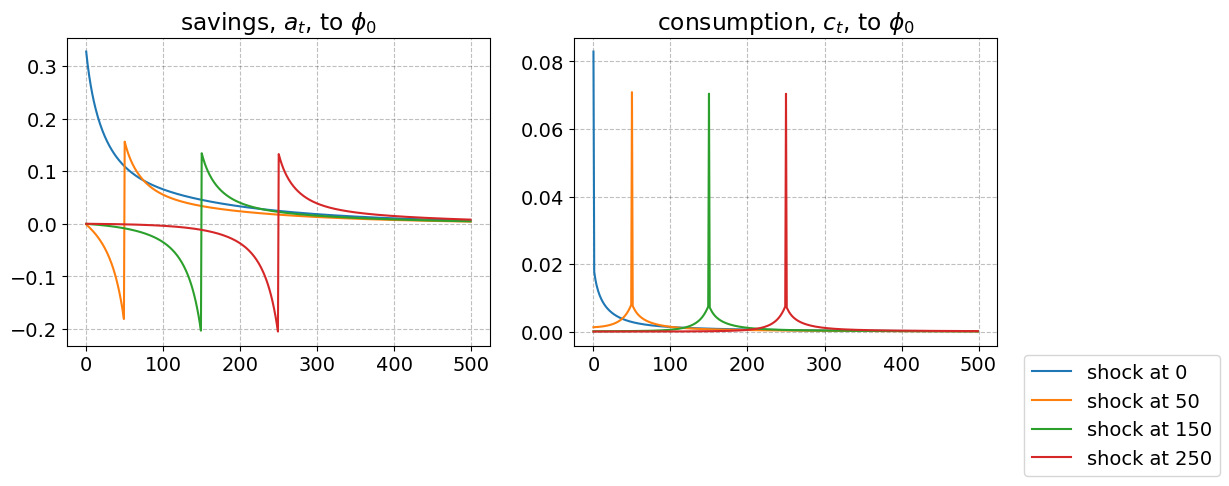

In [21]:
fig = plt.figure(figsize=(12,4),dpi=100)

i = 0

    
    # a. savings
i += 1    
ax = fig.add_subplot(1,2,i)
ax.set_title(f'savings, $a_t$, to $\phi_0$')
for s in [0,50,150,250]:
    jac_hh_var = model.jac_hh[('A_hh','phi_0')]
    ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

if i == 1:
    ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

# b. consumption
i += 1    
ax = fig.add_subplot(1,2,i)
ax.set_title(f'consumption, $c_t$, to $\phi_0$')
for s in [0,50,150,250]:
    jac_hh_var = model.jac_hh[('C_hh','phi_0')]
    ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

In [22]:
# a. define shock
dphi_1 = np.zeros(par.T)
dphi_1[0:9] = 0.1*ss.phi_1
shocks = {'dphi_1':dphi_1} 

# b. find transition path
model.find_transition_path(do_print=True,shocks=shocks)

finding the transition path:
 it =   0 -> max. abs. error = 2.91e-01
 it =   1 -> max. abs. error = 4.61e-03
 it =   2 -> max. abs. error = 1.23e-04
 it =   3 -> max. abs. error = 7.48e-07
 it =   4 -> max. abs. error = 3.92e-09
 it =   5 -> max. abs. error = 1.04e-11
r: terminal value is   0.01239820, but ss value is   0.01239799
I: terminal value is   0.00000000, but ss value is   0.41098044

transition path found in 3.7 secs


### shocks ###


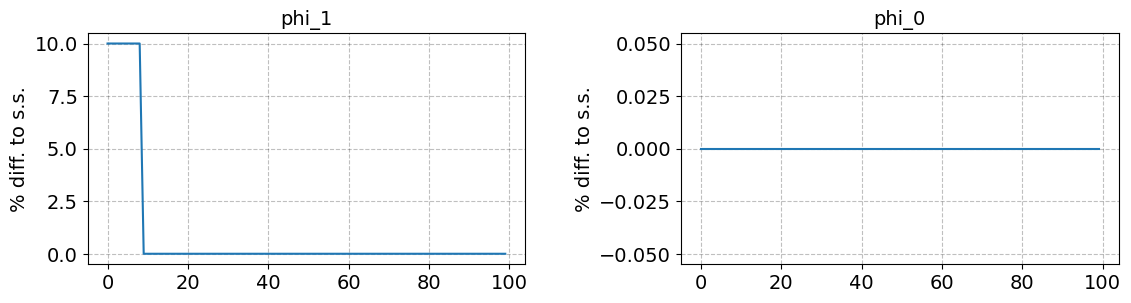


### varnames ###


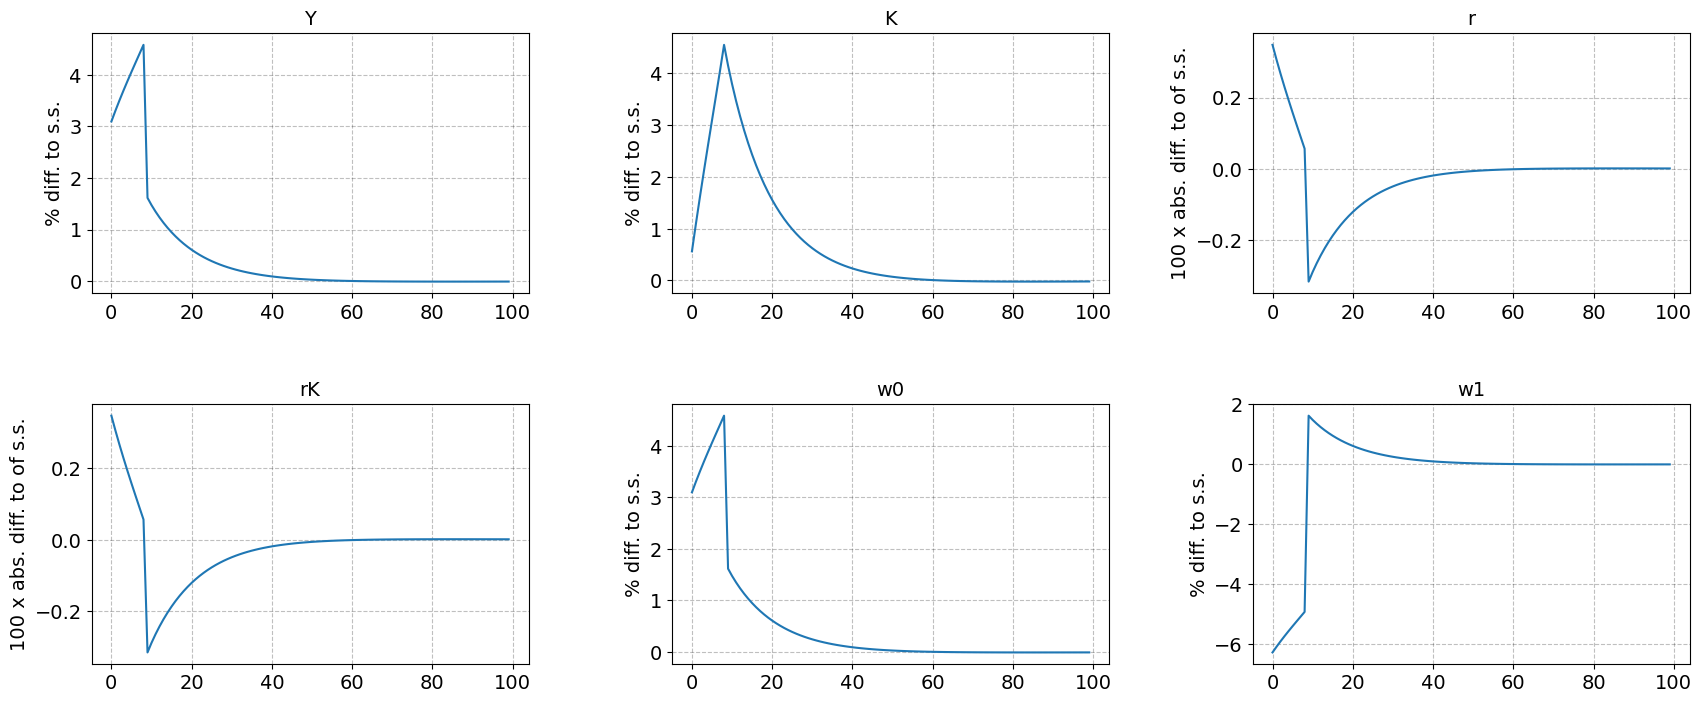


### tagets ###


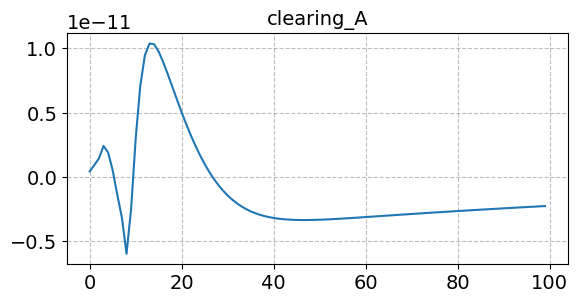

In [23]:
paths = ['Y','K','r','rK','w0','w1']
abs_diff = ['r','rK']
facs = {'r':100,'rK':100}
model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)

## 5. <a id='toc5_'></a>[Find Transition Path Permenant Shock](#toc0_) 

In [24]:
new_model = model.copy()

In [25]:
ss = new_model.ss
ss.phi_1 = 2.2

In [26]:
new_model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.1863
implied ss.w1 = 0.3471
implied ss.w0 = 0.3818
household problem in ss solved in 0.1 secs [325 iterations]
household problem in ss simulated in 0.0 secs [107 iterations]
implied ss.A_hh = 537.9423
clearing_A = -536.94230599

guess ss.K = 2.0000
implied ss.r = 0.0837
implied ss.w1 = 0.4454
implied ss.w0 = 0.4900
household problem in ss solved in 0.2 secs [591 iterations]
household problem in ss simulated in 0.0 secs [313 iterations]
implied ss.A_hh = 514.1788
clearing_A = -512.17878337

guess ss.K = 3.0000
implied ss.r = 0.0417
implied ss.w1 = 0.5154
implied ss.w0 = 0.5670
household problem in ss solved in 0.3 secs [958 iterations]
household problem in ss simulated in 0.3 secs [3131 iterations]
implied ss.A_hh = 504.0470
clearing_A = -501.04702801

guess ss.K = 4.0000
implied ss.r = 0.0179
implied ss.w1 = 0.5717
implied ss.w0 = 0.6288
household problem in ss solved in 0.5 secs [1569 iterations]
household problem in s

In [27]:
for varname in new_model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

K              : 4.3104
phi_0          : 1.0000
phi_1          : 2.2000
rK             : 0.1124
w0             : 0.6460
w1             : 0.5872
Y              : 1.3458
L              : 1.4000
A              : 4.3104
r              : 0.0124
A_hh           : 4.3104
C_hh           : 0.9147
L_hh           : 1.4000
I              : 0.4310
clearing_A     : 0.0000
clearing_L     : 0.0000
clearing_Y     : 0.0000


In [28]:
new_model.compute_jacs(do_print=True) # if skip_shocks = True the full Jacobians to shocks are  not computed

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi_0           in 0.4 secs
curly_Y and curly_D calculated for phi_1           in 0.5 secs
curly_Y and curly_D calculated for r               in 0.4 secs
curly_Y and curly_D calculated for w0              in 0.4 secs
curly_Y and curly_D calculated for w1              in 0.4 secs
curly_E calculated in 0.2 secs
builiding blocks combined in 2.0 secs
household Jacobian computed in 4.1 secs

full Jacobians:
full Jacobian to unknowns computed in 0.5 secs [in evaluate_blocks(): 0.1 secs]
full Jacobian to shocks computed in 0.5 secs [in evaluate_blocks(): 0.3 secs]


In [29]:
# a. define shock
dphi_1 = np.zeros(par.T)
dphi_1[0] = -0.2
shocks = {'dphi_1':dphi_1} 

# b. find transition path
new_model.find_transition_path(do_print=True,shocks=shocks)

finding the transition path:
 it =   0 -> max. abs. error = 3.48e-02
 it =   1 -> max. abs. error = 2.68e-05
 it =   2 -> max. abs. error = 1.03e-07
 it =   3 -> max. abs. error = 7.90e-11
I: terminal value is   0.00000000, but ss value is   0.43103963

transition path found in 2.6 secs


### shocks ###


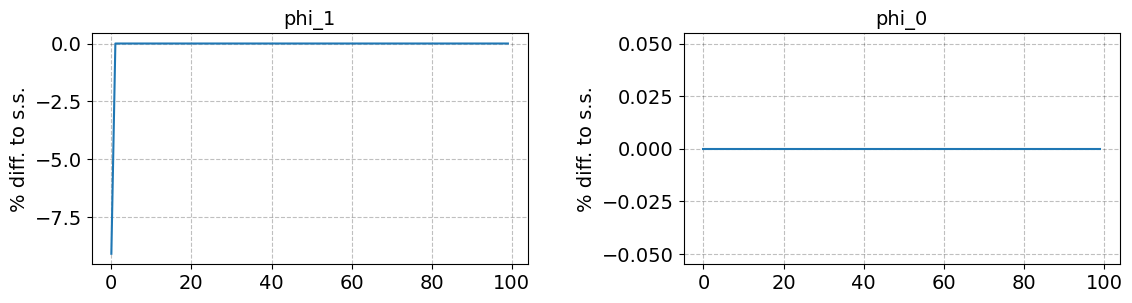


### varnames ###


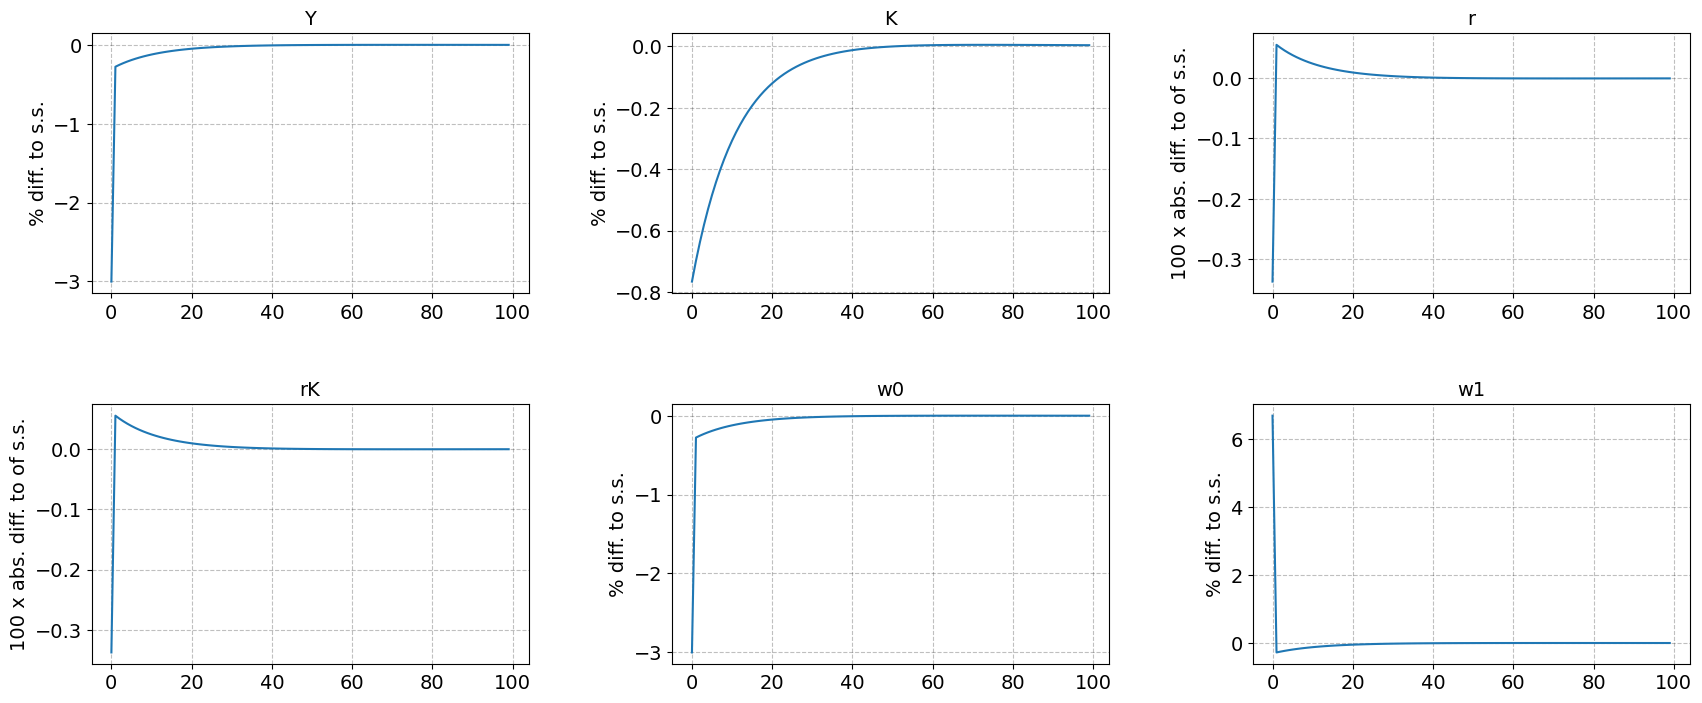


### tagets ###


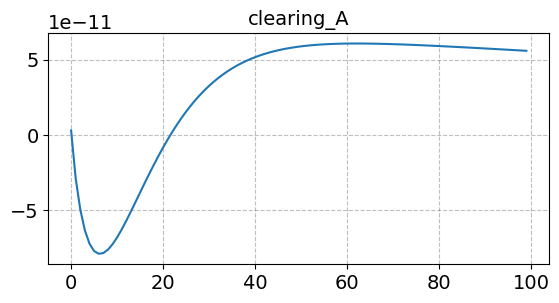

In [30]:
paths = ['Y','K','r','rK','w0','w1']
abs_diff = ['r','rK']
facs = {'r':100,'rK':100}
new_model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)